In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu


### loading AUCs (area under the curve) for each condition


In [2]:

# standard convolutional autoencoder
final_128_nogez_r = np.load('final_128_nogenz/aucs.npy')
#adverserial autoencoder with sigma = 0.1
final_128_r = np.load('final_128_0.1/aucs.npy')
#PCA
final_pca_128_r = np.load('pca_128/aucs.npy')
#adverserial autoencoder with sigma = 1.0
final_128_1_r = np.load('final_128_1.0/aucs.npy')

In [10]:
figures_folder = '../figures2/'

cm = 1/2.54

labels_font = 10
legend_font = 8
ticks_font = 8
title_font = 12

In [11]:
pca_pps = [float(x[1]) for x in final_pca_128_r if '326' not in x[0]]
pca_control = [float(x[1]) for x in final_pca_128_r if '326' in x[0]]

In [12]:
pps_means = [np.mean(pca_pps)]
control_means = [np.mean(pca_control)]
pps_stds = [np.std(pca_pps)]
control_stds = [np.std(pca_control)]

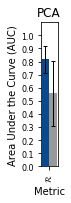

In [16]:

plt.figure(figsize=(0.3,2.65))
x = np.arange(len(pps_means))
width = 0.35

err_props = dict(linewidth=1, capthick=1)
plt.bar(x - width/2,
        pps_means,
        width, label='PPS animals', 
        yerr=pps_stds,
        align='center',
        ecolor='black',
        color=plt.cm.Blues(0.9),
        error_kw = err_props,
        capsize=2)
plt.bar(x + width/2,
        control_means,
        width,
        label='Control animals',
        yerr=control_stds,
        align='center',
        ecolor='black', 
        color=plt.cm.gray(0.6),
        error_kw = err_props,
        capsize=2)
# plt.text(x=0, y=1, s='ns')
plt.xticks(range(len(pps_means)), ['$\mathcal{R}$'] , rotation=90, fontsize=ticks_font);
plt.yticks(np.arange(0,1.1,0.1), fontsize=ticks_font)
plt.ylabel('Area Under the Curve (AUC)', fontsize=labels_font)
plt.xlabel('Metric', fontsize=labels_font)
# plt.legend(fontsize=legend_font, loc='lower right')
plt.ylim([0,1.1])
# plt.grid(axis='y')
plt.title('PCA', fontsize=title_font);
# plt.savefig(figures_folder+'PCAbars.pdf',bbox_inches='tight')

In [17]:
final_128_nogez = np.delete(final_128_nogez_r.reshape((12,10,2)), 2, 0)

In [19]:
x_labels = ['$\mathcal{R}$', '$\mathcal{D}$', '0.1 $\mathcal{R}$', '0.2 $\mathcal{R}$', '0.3 $\mathcal{R}$', 
            '0.4 $\mathcal{R}$', '0.5 $\mathcal{R}$',
            '0.6 $\mathcal{R}$', '0.7 $\mathcal{R}$', '0.8 $\mathcal{R}$', '0.9 $\mathcal{R}$']

In [20]:
pps_means = []
control_means = []
pps_stds = []
control_stds = []

In [21]:
stats=[]
for i in range(11):
    pca_pps = [float(x[1]) for x in final_128_nogez[i] if '326' not in x[0]]
    pca_control = [float(x[1]) for x in final_128_nogez[i] if '326' in x[0]]
    print(mannwhitneyu(pca_pps, pca_control))
    stats.append(mannwhitneyu(pca_pps, pca_control)[1])
    pps_means.append(np.mean(pca_pps))
    control_means.append(np.mean(pca_control))
    pps_stds.append(np.std(pca_pps))
    control_stds.append(np.std(pca_control))    

MannwhitneyuResult(statistic=4.0, pvalue=0.08573010303216372)
MannwhitneyuResult(statistic=5.0, pvalue=0.1272252913231683)
MannwhitneyuResult(statistic=4.0, pvalue=0.08573010303216372)
MannwhitneyuResult(statistic=4.0, pvalue=0.08573010303216372)
MannwhitneyuResult(statistic=4.0, pvalue=0.08573010303216372)
MannwhitneyuResult(statistic=2.0, pvalue=0.03412374418900064)
MannwhitneyuResult(statistic=3.0, pvalue=0.05530603687426152)
MannwhitneyuResult(statistic=3.0, pvalue=0.05530603687426152)
MannwhitneyuResult(statistic=2.0, pvalue=0.03412374418900064)
MannwhitneyuResult(statistic=2.0, pvalue=0.03412374418900064)
MannwhitneyuResult(statistic=2.0, pvalue=0.03412374418900064)


In [25]:
asts  = []
for s in stats:
    if s <0.02:
        asts.append('**')
    elif s <0.05:
        asts.append('*')
    else:
        asts.append(' ')
print(asts)

[' ', ' ', ' ', ' ', ' ', '*', ' ', ' ', '*', '*', '*']


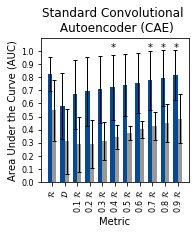

In [26]:

plt.figure(figsize=(2.65,2.65))
x = np.arange(len(pps_means))
width = 0.35

err_props = dict(linewidth=1, capthick=1)
plt.bar(x - width/2,
        pps_means,
        width, label='PPS animals', 
        yerr=pps_stds,
        align='center',
        ecolor='black',
        color=plt.cm.Blues(0.9),
        error_kw = err_props,
        capsize=2)
plt.bar(x + width/2,
        control_means,
        width,
        label='Control animals',
        yerr=control_stds,
        align='center',
        ecolor='black', 
        color=plt.cm.gray(0.6),
        error_kw = err_props,
        capsize=2)
for i in range(len(x)):
    plt.text(x[i]-width, 1.0, asts[i])

plt.xticks(range(len(pps_means)), x_labels, rotation=90, fontsize=ticks_font);
plt.yticks(np.arange(0,1.1,0.1), fontsize=ticks_font)
plt.ylabel('Area Under the Curve (AUC)', fontsize=labels_font)
plt.xlabel('Metric', fontsize=labels_font)
# plt.legend(fontsize=legend_font, loc='lower right')
plt.ylim([0,1.1])
# plt.grid(axis='y')
plt.title('Standard Convolutional \n Autoencoder (CAE)', fontsize=title_font);
# plt.savefig(figures_folder+'standard_auto.pdf',bbox_inches='tight')

In [27]:
final_128 = np.delete(final_128_r.reshape((12,10,2)), 2, 0)

In [28]:
pps_means = []
control_means = []
pps_stds = []
control_stds = []

In [29]:
stats = []
for i in range(11):
    pca_pps = [float(x[1]) for x in final_128[i] if '326' not in x[0]]
    pca_control = [float(x[1]) for x in final_128[i] if '326' in x[0]]
    print(mannwhitneyu(pca_pps, pca_control))
    stats.append(mannwhitneyu(pca_pps, pca_control)[1])
    pps_means.append(np.mean(pca_pps))
    control_means.append(np.mean(pca_control))
    pps_stds.append(np.std(pca_pps))
    control_stds.append(np.std(pca_control))  


MannwhitneyuResult(statistic=0.0, pvalue=0.011327247040044673)
MannwhitneyuResult(statistic=9.0, pvalue=0.40985376891489417)
MannwhitneyuResult(statistic=6.0, pvalue=0.18096738346059615)
MannwhitneyuResult(statistic=5.0, pvalue=0.1272252913231683)
MannwhitneyuResult(statistic=1.0, pvalue=0.0201193385598797)
MannwhitneyuResult(statistic=1.0, pvalue=0.0201193385598797)
MannwhitneyuResult(statistic=1.0, pvalue=0.0201193385598797)
MannwhitneyuResult(statistic=0.0, pvalue=0.011327247040044673)
MannwhitneyuResult(statistic=0.0, pvalue=0.011327247040044673)
MannwhitneyuResult(statistic=0.0, pvalue=0.011327247040044673)
MannwhitneyuResult(statistic=0.0, pvalue=0.011327247040044673)


In [31]:
asts  = []
for s in stats:
    if s <0.02:
        asts.append('**')
    elif s <0.05:
        asts.append('*')
    else:
        asts.append(' ')
print(asts)

['**', ' ', ' ', ' ', '*', '*', '*', '**', '**', '**', '**']


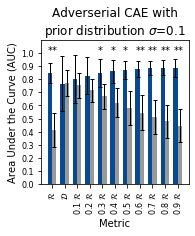

In [32]:


plt.figure(figsize=(2.65,2.65))
x = np.arange(len(pps_means))
width = 0.35


err_props = dict(linewidth=1, capthick=1)
plt.bar(x - width/2,
        pps_means,
        width, label='PPS animals', 
        yerr=pps_stds,
        align='center',
        ecolor='black',
        color=plt.cm.Blues(0.9),
        error_kw = err_props,
        capsize=2)
plt.bar(x + width/2,
        control_means,
        width,
        label='Control animals',
        yerr=control_stds,
        align='center',
        ecolor='black', 
        color=plt.cm.gray(0.6),
        error_kw = err_props,
        capsize=2)
for i in range(len(x)):
    plt.text(x[i]-width/1, 1.0, asts[i])
plt.xticks(range(len(pps_means)), x_labels, rotation=90, fontsize=ticks_font);
plt.yticks(np.arange(0,1.1,0.1), fontsize=ticks_font)
plt.ylabel('Area Under the Curve (AUC)', fontsize=labels_font)
plt.xlabel('Metric', fontsize=labels_font)
# plt.legend(fontsize=legend_font, loc='lower right')
plt.ylim([0,1.1])
# plt.grid(axis='y')
plt.title('Adverserial CAE with\nprior distribution $\sigma$=0.1', fontsize=title_font);
# plt.savefig(figures_folder+'adverserial_auto0.1.pdf',bbox_inches='tight')

In [33]:
final_128_1 = np.delete(final_128_1_r.reshape((12,10,2)), 2, 0)

In [34]:
pps_means = []
control_means = []
pps_stds = []
control_stds = []

In [35]:
stats=[]
for i in range(11):
    pca_pps = [float(x[1]) for x in final_128_1[i] if '326' not in x[0]]
    pca_control = [float(x[1]) for x in final_128_1[i] if '326' in x[0]]
    print(mannwhitneyu(pca_pps, pca_control))
    stats.append(mannwhitneyu(pca_pps, pca_control)[1])
    pps_means.append(np.mean(pca_pps))
    control_means.append(np.mean(pca_control))
    pps_stds.append(np.std(pca_pps))
    control_stds.append(np.std(pca_control))  


MannwhitneyuResult(statistic=1.0, pvalue=0.0201193385598797)
MannwhitneyuResult(statistic=3.0, pvalue=0.05530603687426152)
MannwhitneyuResult(statistic=3.0, pvalue=0.05530603687426152)
MannwhitneyuResult(statistic=3.0, pvalue=0.05530603687426152)
MannwhitneyuResult(statistic=2.0, pvalue=0.03412374418900064)
MannwhitneyuResult(statistic=2.0, pvalue=0.03412374418900064)
MannwhitneyuResult(statistic=2.0, pvalue=0.03412374418900064)
MannwhitneyuResult(statistic=2.0, pvalue=0.03412374418900064)
MannwhitneyuResult(statistic=2.0, pvalue=0.03412374418900064)
MannwhitneyuResult(statistic=2.0, pvalue=0.03412374418900064)
MannwhitneyuResult(statistic=1.0, pvalue=0.0201193385598797)


In [36]:
asts  = []
for s in stats:
    if s <0.02:
        asts.append('**')
    elif s <0.05:
        asts.append('*')
    else:
        asts.append(' ')
print(asts)

['*', ' ', ' ', ' ', '*', '*', '*', '*', '*', '*', '*']


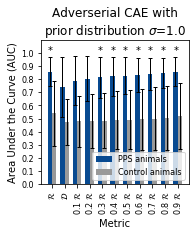

In [37]:

plt.figure(figsize=(2.65,2.65))
x = np.arange(len(pps_means))
width = 0.35

err_props = dict(linewidth=1, capthick=1)

plt.bar(x - width/2,
        pps_means,
        width, label='PPS animals', 
        yerr=pps_stds,
        align='center',
        ecolor='black',
        color=plt.cm.Blues(0.9),
        error_kw = err_props,
        capsize=2)
plt.bar(x + width/2,
        control_means,
        width,
        label='Control animals',
        yerr=control_stds,
        align='center',
        ecolor='black', 
        color=plt.cm.gray(0.6),
        error_kw = err_props,
        capsize=2)
for i in range(len(x)):
    plt.text(x[i]-width, 1.0, asts[i])
plt.xticks(range(len(pps_means)), x_labels, rotation=90, fontsize=ticks_font);
plt.yticks(np.arange(0,1.1,0.1), fontsize=ticks_font)
plt.ylabel('Area Under the Curve (AUC)', fontsize=labels_font)
plt.xlabel('Metric', fontsize=labels_font)
plt.legend(fontsize=legend_font, loc='lower right')
plt.ylim([0,1.1])
# plt.grid(axis='y')

plt.title('Adverserial CAE with\nprior distribution $\sigma$=1.0', fontsize=title_font);
# plt.savefig(figures_folder+'adverserial_auto1.0.pdf',bbox_inches='tight')